In [80]:
# Примерное содержание проекта 
# цель проекта
# источники данных
# используемые методы 
# как парсинг осуществлялся 
# анализ (факторный или кластерный) 
# результаты исследования


In [ ]:
# выделим качества телефона
# библиотека достевского для измерения тональности текста
# цена и качество 
# в виде отношения 
# тональность цены (цена огонь, классная, неприятная)
# тональность качества (если нет цены, то ориентир на качество)

# карта цена(х) против качества(у)
# текст разбить на части в которых цена ( отделяем регуляркой цена,  ценой, скидк{1-3}, руб, евро) есть и в которй нет цены
# в которой нет цен кормить на оценку тональности 

In [1]:
url = 'https://irecommend.ru/content/smartfon-apple-iphone-11-0?page='
samsung = 'https://irecommend.ru/catalog/list/55-68?page='
apple = 'https://irecommend.ru/catalog/list/55-573'
xiaomi = 'https://irecommend.ru/catalog/list/55-428153'
irecommend = 'https://irecommend.ru'
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',options=chrome_options)
wd.get('https://raex-rr.com/pro/ESG/ESG_companies/ESG_rating_companies/2022.11/')
!pip install dostoevsky
!python3 -m dostoevsky download fasttext-social-network-model
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel
tokenizer = RegexTokenizer()
model = FastTextSocialNetworkModel(tokenizer=tokenizer)


import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans
import matplotlib

import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.3 MB 24.7 MB/s 
     |████████████████████████████████| 384 kB 57.1 MB/s 
     |████████████████████████████████| 140 kB 40.8 MB/s 
     |████████████████████████████████| 58 kB 6.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.13 which is incompatible.


Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:14 http://ppa.launchpad.net

In [2]:
# проверяем топ 10 телефонов Xiaomi по количеству отзывов
# Эта штука парсит название ссылок нормально
# link = []
rev_am = []
rev_links = []

wd.get(xiaomi)
soup=BeautifulSoup(wd.page_source)
# pages_num = int(soup.find('ul', class_='pager').attrs['class'][2][6:])
pages_num = int(soup.find('ul', class_='pager').find('li', class_="last").text)

for i in range(pages_num):
  wd.get(xiaomi+'?page='+str(i))
  # page = requests.get(samsung+str(i)).text
  # soup = BeautifulSoup(page)
  soup=BeautifulSoup(wd.page_source)
  temp_tag = soup.find("div", class_="view-content").findAll("div", class_='ProductTizer')
  rev_am += [x.find('span', class_='counter').text for x in temp_tag]
  rev_links += [x.find('div', class_='title').find('a').attrs['href'] for x in temp_tag]
# links += [x.find('div', class_='reviewTextSnippet').find('a').get("href") for x in temp_tag.find_all('li')]


In [3]:
# Функция, которая проверяет топ 10 телефонов по количеству отзывов

def rev_links_getter(link):
  rev_am = []
  rev_links = []
  wd.get(link)
  soup=BeautifulSoup(wd.page_source)
  pages_num = int(soup.find('ul', class_='pager').find('li', class_="last").text)
  
  for i in range(pages_num):
    wd.get(link+'?page='+str(i))
    soup=BeautifulSoup(wd.page_source)
    temp_tag = soup.find("div", class_="view-content").findAll("div", class_='ProductTizer')
    rev_am += [x.find('span', class_='counter').text for x in temp_tag]
    rev_links += [x.find('div', class_='title').find('a').attrs['href'] for x in temp_tag]
  return rev_am, rev_links


In [4]:
# получаем ссылки на телефоны и количество отзывов по каждому телефону
rev_am, rev_links = rev_links_getter(xiaomi)
rev_links

['/content/mobilnyi-telefon-xiaomi-redmi-7-2',
 '/content/mobilnyi-telefon-xiaomi-redmi-note-11-pro',
 '/content/mobilnyi-telefon-xiaomi-redmi-note-10-pro',
 '/content/mobilnyi-telefon-xiaomi-mi-11-ultra',
 '/content/mobilnyi-telefon-xiaomi-redmi-note-9-pro',
 '/content/mobilnyi-telefon-xiaomi-redmi-6a-32gb',
 '/content/mobilnyi-telefon-xiaomi-redmi-9c-nfc-364',
 '/content/mobilnyi-telefon-xiaomi-redmi-note-9s',
 '/content/mobilnyi-telefon-xiaomi-redmi-7a-6',
 '/content/mobilnyi-telefon-xiaomi-redmi-10',
 '/content/mobilnyi-telefon-xiaomi-11t',
 '/content/mobilnyi-telefon-xiaomi-redmi-note-4x',
 '/content/mobilnyi-telefon-xiaomi-poco-x3-pro-2',
 '/content/mobilnyi-telefon-xiaomi-mi-10t',
 '/content/mobilnyi-telefon-xiaomi-redmi-note-11',
 '/content/mobilnyi-telefon-xiaomi-smartfon-redmi-9a',
 '/content/mobilnyi-telefon-xiaomi-11-lite-5g-ne',
 '/content/mobilnyi-telefon-xiaomi-redmi-note-11s',
 '/content/smartfon-xiaomi-redmi-note-8-pro',
 '/content/mobilnyi-telefon-xiaomi-redmi-note-8t

In [5]:
# ищем топ 10 смартфонов
df_samsung = pd.DataFrame({'link': rev_links, 'amount': [int(x) for x in rev_am]})
df_samsung = df_samsung.sort_values('amount', ascending=False).head(10)

df_samsung

,link,amount
18,/content/smartfon-xiaomi-redmi-note-8-pro,327
42,/content/mobilnyi-telefon-xiaomi-redmi-note-7,229
24,/content/mobilnyi-telefon-xiaomi-redmi-4x,204
62,/content/mobilnyi-telefon-xiaomi-redmi-note-5-...,125
11,/content/mobilnyi-telefon-xiaomi-redmi-note-4x,125
46,/content/mobilnyi-telefon-xiaomi-redmi-4-pro-3...,113
75,/content/mobilnyi-telefon-xiaomi-redmi-3s-16gb,113
78,/content/mobilnyi-telefon-xiaomi-redmi-note-4-...,110
32,/content/mobilnyi-telefon-xiaomi-redmi-4a,108
61,/content/mobilnyi-telefon-xiaomi-redmi-5-plus-0,100


In [ ]:
# ищем топ 10 смартфонов
df_apple = pd.DataFrame({'link': rev_links, 'amount': [int(x) for x in rev_am]})
df_apple = df_apple.sort_values('amount', ascending=False).head(10)

df_apple

,link,amount
8,/content/apple-iphone-5s-0,333
3,/content/smartfon-apple-iphone-11-0,312
0,/content/mobilnyi-telefon-apple-iphone-7-1,292
37,/content/apple-apple-iphone-4s,290
32,/content/apple-apple-iphone-4-32gb,287
33,/content/mobilnyi-telefon-apple-iphone-se-0,272
29,/content/apple-iphone-5,243
14,/content/mobilnyi-telefon-apple-iphone-6s-0,236
21,/content/mobilnyi-telefon-apple-iphone-6-1,234
4,/content/mobilnyi-telefon-apple-iphone-xr-0,228


In [6]:
links_top10 = [item for subl in df_samsung[['link']].values.tolist() for item in subl]
links_top10

['/content/smartfon-xiaomi-redmi-note-8-pro',
 '/content/mobilnyi-telefon-xiaomi-redmi-note-7',
 '/content/mobilnyi-telefon-xiaomi-redmi-4x',
 '/content/mobilnyi-telefon-xiaomi-redmi-note-5-464gb',
 '/content/mobilnyi-telefon-xiaomi-redmi-note-4x',
 '/content/mobilnyi-telefon-xiaomi-redmi-4-pro-3gb32gb',
 '/content/mobilnyi-telefon-xiaomi-redmi-3s-16gb',
 '/content/mobilnyi-telefon-xiaomi-redmi-note-4-364-gb',
 '/content/mobilnyi-telefon-xiaomi-redmi-4a',
 '/content/mobilnyi-telefon-xiaomi-redmi-5-plus-0']

In [ ]:
links_top10 = [item for subl in df_apple[['link']].values.tolist() for item in subl]
links_top10

['/content/apple-iphone-5s-0',
 '/content/smartfon-apple-iphone-11-0',
 '/content/mobilnyi-telefon-apple-iphone-7-1',
 '/content/apple-apple-iphone-4s',
 '/content/apple-apple-iphone-4-32gb',
 '/content/mobilnyi-telefon-apple-iphone-se-0',
 '/content/apple-iphone-5',
 '/content/mobilnyi-telefon-apple-iphone-6s-0',
 '/content/mobilnyi-telefon-apple-iphone-6-1',
 '/content/mobilnyi-telefon-apple-iphone-xr-0']

In [7]:
# на самсунге 1500 отзывов парсилось ~1ч10мин
# на xiaomi 1300 отзывов парсилось ~1ч05мин
# на apple 1500 отзывов парсилось ~1ч30мин


# rewiew_links = []
manufacturer = 'Xiaomi'
df = pd.DataFrame()
# пробегаемся по разным товарам конкретного производителя
for link_top10 in links_top10:
  wd.get(irecommend+link_top10)
  soup=BeautifulSoup(wd.page_source)

  # так находятся ссылки на полные тексты отзывов с первой страницы товара
  name = soup.find('span', class_='fn').text
  pages_num = int(soup.find('ul', class_='pager').attrs['class'][2][6:])
  review_links = [x.find('div', class_='reviewTitle').find('a').attrs['href'] for x in soup.find("ul", class_="list-comments").findAll('li') if x.find('div', class_='reviewTitle')!= None]
  
  # а так находятся ссылки на полные тексты отзывов с оставшихся страниц товара
  for i in range(1, pages_num):
    wd.get(irecommend+link_top10+'?page='+str(i))
    soup=BeautifulSoup(wd.page_source)
    review_links += [x.find('div', class_='reviewTitle').find('a').attrs['href'] for x in soup.find("ul", class_="list-comments").findAll('li') if x.find('div', class_='reviewTitle')!= None]

  # тут получаем всю информацию о каждом отзыве блоками
  reviewBlocks_sel = []
  for link in review_links:
    wd.get(irecommend+link)
    soup=BeautifulSoup(wd.page_source)
    reviewBlocks_sel.append(soup.find("div", class_="reviewBlock")) 

  # Тут вычленяем нужную информацию из блоков и кладем в датафрейм
  df_temp = pd.DataFrame({'manufacturer': [manufacturer]*len(review_links),
                          'name': [name]*len(review_links),
                          'link': review_links,
                          'author': [x.find('div', class_="authorBlock").text.replace('\n', '').strip() for x in reviewBlocks_sel],
                          'rating': [x.find('div', class_="starsRating").find_all('meta')[2].attrs['content'] for x in reviewBlocks_sel],
                          'date': [x.find('div', class_="com-date").find('meta').attrs['content'] for x in reviewBlocks_sel],
                          'summary': [x.find('a', class_="review-summary").text for x in reviewBlocks_sel],
                          'review': [x.find('div', class_="description").text.replace('\\n\\n', '\\n') for x in reviewBlocks_sel],
  })
  df = df.append(df_temp, ignore_index=True)
    



AttributeError: ignored

In [8]:
df

,manufacturer,name,link,author,rating,date,summary,review
0,Xiaomi,Смартфон Xiaomi Redmi note 8 pro,/content/3-mesyatsa-s-xiaomi-redmi-note-8-pro-...,MMDams,5,2020-03-01T05:46:19+01:00,Более 6 месяцев с Xiaomi Redmi note 8 pro. Мин...,"\nПосле того, как я за год трижды разбивала св..."
1,Xiaomi,Смартфон Xiaomi Redmi note 8 pro,/content/pochemu-polzuyas-postoyanno-iphone-ya...,Мария P,5,2020-01-10T15:49:36+01:00,"Почему, пользуясь постоянно iPhone, я приобрел...","\nПриветствую Вас , уважаемые читатели ! ??Сво..."
2,Xiaomi,Смартфон Xiaomi Redmi note 8 pro,/content/nedostatki-xiaomi-redmi-note-8-pro-no...,Verun4iki,5,2020-04-14T09:23:20+02:00,Недостатки Xiaomi Redmi Note 8 pro. Но не смо...,\nПочему я выбрала его?1. Ценовая категория. Я...
3,Xiaomi,Смартфон Xiaomi Redmi note 8 pro,/content/smartfon-xiaomi-redmi-note-8-pro-glob...,katya_maksimova,4,2019-11-04T16:08:15+01:00,Смартфон Xiaomi Redmi Note 8 Pro (Global Versi...,\nПривет).Сегодня мой обзор будет посвящен одн...
4,Xiaomi,Смартфон Xiaomi Redmi note 8 pro,/content/64mp-kamera-za-12-tysyach-rublei-ubii...,Bombardir007,5,2019-12-13T13:55:42+01:00,"64МП-камера за 12 тысяч рублей? ""Убийца флагм...",\nВсем привет!Сегодня мою юбилейный 150-й отзы...
...,...,...,...,...,...,...,...,...
1231,Xiaomi,Смартфон Xiaomi Redmi 3S,/content/luchshii-do-9000-rublei,gudronn,5,2016-11-26T08:35:09+01:00,Лучший до 9000 рублей,\nОтличный телефон. За свои деньги лучше не на...
1232,Xiaomi,Смартфон Xiaomi Redmi 3S,/content/otlichnyi-telefon-za-svoi-dengi-17,TealVeal,5,2017-05-20T16:28:26+02:00,Отличный телефон за свои деньги,\nПривет. Решил поделиться своим мнением насчё...
1233,Xiaomi,Смартфон Xiaomi Redmi 3S,/content/otlichnyi-smartfon-za-nizkuyu-tsenu-n...,василек_светлячок,5,2016-09-06T14:30:56+02:00,Отличный смартфон за низкую цену. Нелопата,"\nКупила этот смартфон месяц назад, начитавшис..."
1234,Xiaomi,Смартфон Xiaomi Redmi 3S,/content/khoroshii-byudzhetnik-12,business_viktor,4,2018-08-25T08:15:33+02:00,Хороший бюджетник,\nКупил смартфон около 2-ух лет назад . За это...


In [40]:
# запись полученных данных в таблицу
df.to_csv('./xiaomi.csv',sep=';', encoding='cp1251', errors='ignore') 


,manufacturer,name,link,author,rating,date,summary,review
0,Apple,Смартфон Apple iPhone 5s,/content/khodila-s-iphone-5s-v-2021-godu-perez...,Alenasteel26,5.0,2021-10-07T13:13:49+02:00,Ходила с Iphone 5s в 2021 году Пережил свадьб...,\nВ 2016 году на окончание института бывший му...
1,Apple,Смартфон Apple iPhone 5s,/content/odin-iz-samykh-udachnykh-smartfonov-v...,Internity,5.0,2018-01-26T13:36:59+01:00,Один из самых удачных смартфонов в линейке App...,"\n Доброго времени суток, друзья! Сегодня у ме..."
2,Apple,Смартфон Apple iPhone 5s,/content/chestnyi-otzyv-o-plyusakh-i-minusakh-...,Monadora,4.0,2019-01-31T18:11:33+01:00,ЧЕСТНЫЙ ОТЗЫВ О ПЛЮСАХ И МИНУСАХ iPhone 5s пос...,"\n""Android критикуют те, у кого БЫЛ Android. А..."
3,Apple,Смартфон Apple iPhone 5s,/content/nadezhnaya-zvonilka-i-normalnaya-kame...,filippenko82,4.0,2022-07-27T12:53:55+02:00,Надежная звонилка и нормальная камера за миним...,\nАйфонами я пользуюсь с 2013 года. Первый мой...
4,Apple,Смартфон Apple iPhone 5s,/content/stoit-li-brat-iphone-5s-v-2020-godu,Slava002,5.0,2020-08-23T07:48:49+02:00,Стоит ли брать iPhone 5s в 2020 году?,"\nДоброе утро, друзья! Сегодня вновь решила об..."
...,...,...,...,...,...,...,...,...
2733,Apple,Смартфон Apple iPhone XR,/content/baldezh-5,Clean69,5.0,2020-08-03T03:52:45+02:00,Балдеж,"\nОтличный телефон, ходил с ним долго, пользов..."
2734,Apple,Смартфон Apple iPhone XR,/content/iphone-xr-vse-eshche-aktualen-v-2022-...,JemSparks,5.0,2022-12-04T22:41:40+01:00,IPHONE XR ВСЁ ЕЩЁ АКТУАЛЕН В 2022? ОЧЕВИДНО ДА.,\nЗа все 18 лет моей жизни из техники от Apple...
2735,Apple,Смартфон Apple iPhone XR,/content/otlichnyi-devais-23,RusUser,4.0,2020-03-14T18:33:28+01:00,Отличный девайс!,\nДанный продукт Apple рассчитан как бюджетный...
2736,Apple,Смартфон Apple iPhone XR,/content/navernoe-luchshii-smartfon,Коваль Данил,5.0,2020-04-27T14:54:26+02:00,Наверное лучший смартфон,\nДобрый день!Купил я данный телефон около дву...


In [ ]:
# после объединения всех данных по всем производителям, запишем их в таблицу
df.to_csv('./ap_xia_sam.csv',sep=';', encoding='cp1251', errors='ignore') 


КОНЕЦ ПАРСИНГА

НАЧАЛО АНАЛИЗА

In [43]:
df = pd.read_csv('./ap_xia_sam.csv', sep=';', encoding ='cp1251', encoding_errors='ignore')
df = df.drop(columns=['Unnamed: 0'])
df

,manufacturer,name,link,author,rating,date,summary,review
0,Apple,Смартфон Apple iPhone 5s,/content/khodila-s-iphone-5s-v-2021-godu-perez...,Alenasteel26,5.0,2021-10-07T13:13:49+02:00,Ходила с Iphone 5s в 2021 году Пережил свадьб...,\nВ 2016 году на окончание института бывший му...
1,Apple,Смартфон Apple iPhone 5s,/content/odin-iz-samykh-udachnykh-smartfonov-v...,Internity,5.0,2018-01-26T13:36:59+01:00,Один из самых удачных смартфонов в линейке App...,"\n Доброго времени суток, друзья! Сегодня у ме..."
2,Apple,Смартфон Apple iPhone 5s,/content/chestnyi-otzyv-o-plyusakh-i-minusakh-...,Monadora,4.0,2019-01-31T18:11:33+01:00,ЧЕСТНЫЙ ОТЗЫВ О ПЛЮСАХ И МИНУСАХ iPhone 5s пос...,"\n""Android критикуют те, у кого БЫЛ Android. А..."
3,Apple,Смартфон Apple iPhone 5s,/content/nadezhnaya-zvonilka-i-normalnaya-kame...,filippenko82,4.0,2022-07-27T12:53:55+02:00,Надежная звонилка и нормальная камера за миним...,\nАйфонами я пользуюсь с 2013 года. Первый мой...
4,Apple,Смартфон Apple iPhone 5s,/content/stoit-li-brat-iphone-5s-v-2020-godu,Slava002,5.0,2020-08-23T07:48:49+02:00,Стоит ли брать iPhone 5s в 2020 году?,"\nДоброе утро, друзья! Сегодня вновь решила об..."
...,...,...,...,...,...,...,...,...
5384,samsung,Samsung Galaxy S II,/content/srednii-byudzhetnyi-telefon,lyusiena,4.0,2016-01-14T09:39:04+01:00,Средний бюджетный телефон,\nКупила телефон 4 года назад. Функционал меня...
5385,samsung,Samsung Galaxy S II,/content/telefon-mechta-5,LeN@.,5.0,2013-03-10T13:48:23+01:00,телефон мечта,\n У этого телефона Супер амулет экр...
5386,samsung,Samsung Galaxy S II,/content/android-vashei-mechty,denis1997,5.0,2012-03-31T17:37:18+02:00,Андроид вашей мечты!,"\n Очень удобный андроид, поддержива..."
5387,samsung,Samsung Galaxy S II,/content/otlichnyi-telefon-71,germetikon2012,5.0,2012-08-26T14:07:47+02:00,Отличный телефон!,\n нужна подработка?Доступный и инте...


In [44]:
# разбивка на предложения и анализ тональности

price_sentiment_dict = [-1, -0.7, 0.5, 0.8, 1] #использую это, если предложение с ценой не нашлось

# price_mention = []
text_sentiment = []
price_sentiment = []
for i,key in df.iterrows():
  price_sentiment_flag = False
  # if (i == 50):
  #   break
  # print(i)
  review = key.review
  review = re.sub(r'[\xa0?!]', '.', review)
  review = re.sub('\n', '.', review)
  review = re.sub('[\.]+', '.', review)
  lines = review.split('.')
  
  results = model.predict(lines, k=2)

  pos, neg, all = 0, 0, 0
  
  mark = 0  
  for line, sentiment in zip(lines, results):
    # сначала смотрим есть ли в предложении упоминание о цене. Если есть, его тональность относим к тональности цены
    if re.search('[Сс]кидк..? | руб | цена | ценой | цене', line) != None:
      if price_sentiment_flag == False:
        # price_mention.append(line)
        if next(iter(sentiment)) == 'positive':
          price_sentiment.append(sentiment['positive'])
          price_sentiment_flag = True
        elif next(iter(sentiment)) == 'negative':
          price_sentiment.append((-1)*sentiment['negative'])
          price_sentiment_flag = True        
    else:
      # если же нет упоминания о цене, то смотрим тональность предложения
      if next(iter(sentiment)) == 'positive':
        pos = pos + 1
      if next(iter(sentiment)) == 'negative':
        neg = neg + 1
      if line != '':
        all = all + 1
  # если упоминания цены не было, то тональность цены оценивается по рейтингу
  if price_sentiment_flag == False:
    price_sentiment.append(price_sentiment_dict[int(key.rating)-1])
  # print(re.search('[Сс]кидк..? | руб | цена | ценой | цене', key.review))
  mark = 0 if (pos+neg) == 0 else (pos - neg)/ (pos + neg)
  text_sentiment.append(mark)

  # print('price: '+ str(price_mention) + '||' + str(price_sentiment))
  # print('mark: ' + str(round(mark, 3)))
  # print('-----------------')

print(text_sentiment)
print(price_sentiment)
  
  
# выкинуть отзывы где тональность не соотвествует оценке
# тональность как (доля pos) - доля neg / 

[0.09090909090909091, 0.6, -0.25, 0.15789473684210525, 0.0, 0.3333333333333333, 1.0, 0.05555555555555555, 0.0, 0.2, 0.1111111111111111, 0.1, -0.3333333333333333, 0.36363636363636365, 0.4, 0.5, -0.2727272727272727, -0.41935483870967744, 0.2727272727272727, 0.5, 0.6, 0.5555555555555556, -0.21212121212121213, -0.07692307692307693, 0.375, 0.1111111111111111, 0.2, 0.0, 0.3333333333333333, 0.5384615384615384, 0.17647058823529413, 1.0, 0.1111111111111111, 0.23076923076923078, 0.6666666666666666, 0.06666666666666667, 0.15789473684210525, 0.6, 0.45454545454545453, 0.42857142857142855, 0.0, 0.2727272727272727, 0.2727272727272727, 0.3333333333333333, 0.14285714285714285, 1.0, -0.3333333333333333, 0.1, 1.0, 0.3333333333333333, 0.6666666666666666, 0.3333333333333333, 0.1111111111111111, 0.36363636363636365, -0.42857142857142855, 0.3333333333333333, -0.3333333333333333, 0.0, -0.25, 0.25, -0.4, 0.2, 0.2, -0.1111111111111111, 0, 0.5, 0.0, -0.1111111111111111, -0.2, 0.0, 0.125, 0.5, -0.2, 0.55555555555

In [45]:
df['text_sentiment'] = text_sentiment
df['price_sentiment'] = price_sentiment
df = df.drop(df[(df.rating-2.1)*(df.text_sentiment+0.02)<0].index)
df1 = df[['manufacturer', 'name', 'text_sentiment', 'price_sentiment']]
df1

,manufacturer,name,text_sentiment,price_sentiment
0,Apple,Смартфон Apple iPhone 5s,0.090909,1.0
1,Apple,Смартфон Apple iPhone 5s,0.600000,1.0
3,Apple,Смартфон Apple iPhone 5s,0.157895,0.8
4,Apple,Смартфон Apple iPhone 5s,0.000000,1.0
5,Apple,Смартфон Apple iPhone 5s,0.333333,0.8
...,...,...,...,...
5383,samsung,Samsung Galaxy S II,1.000000,1.0
5385,samsung,Samsung Galaxy S II,0.000000,1.0
5386,samsung,Samsung Galaxy S II,1.000000,1.0
5387,samsung,Samsung Galaxy S II,0.000000,1.0


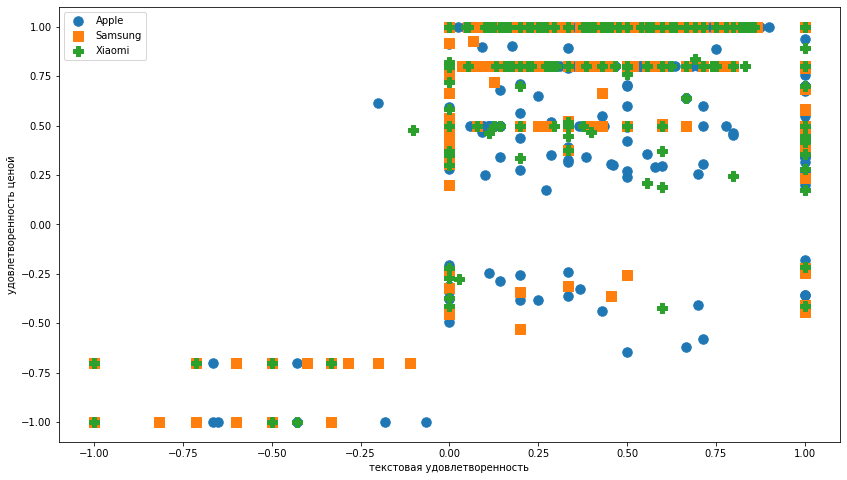

In [146]:
size = 90
plt.figure(figsize=(14, 8))


plt.scatter(df1[df1.manufacturer == 'Apple']['text_sentiment'],df1[df1.manufacturer == 'Apple']['price_sentiment'], s = size)
plt.scatter(df1[df1.manufacturer == 'samsung']['text_sentiment'],df1[df1.manufacturer == 'samsung']['price_sentiment'], marker = 's', s = size)
plt.scatter(df1[df1.manufacturer == 'Xiaomi']['text_sentiment'],df1[df1.manufacturer == 'Xiaomi']['price_sentiment'], marker = 'P', s = size)
plt.legend(["Apple", "Samsung", "Xiaomi"])
plt.xlabel("текстовая удовлетворенность")
plt.ylabel("удовлетворенность ценой")
plt.show()


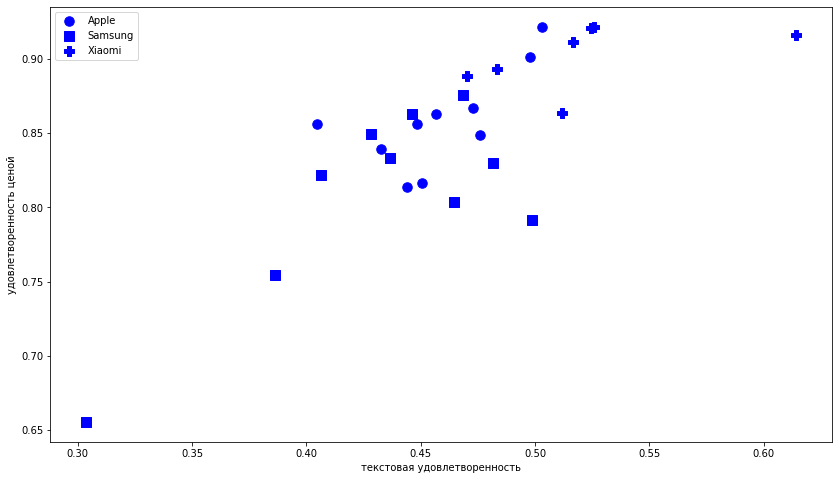

In [144]:
size = 90
plt.figure(figsize=(14, 8))


plt.scatter(df1[df1.manufacturer == 'Apple'].groupby('name').mean()['text_sentiment'],df1[df1.manufacturer == 'Apple'].groupby('name').mean()['price_sentiment'], s = size, c = 'blue')
plt.scatter(df1[df1.manufacturer == 'samsung'].groupby('name').mean()['text_sentiment'],df1[df1.manufacturer == 'samsung'].groupby('name').mean()['price_sentiment'], marker = 's', s = size, c = 'blue')
plt.scatter(df1[df1.manufacturer == 'Xiaomi'].groupby('name').mean()['text_sentiment'],df1[df1.manufacturer == 'Xiaomi'].groupby('name').mean()['price_sentiment'], marker = 'P', s = size, c = 'blue')
plt.legend(["Apple", "Samsung", "Xiaomi"])
plt.xlabel("текстовая удовлетворенность")
plt.ylabel("удовлетворенность ценой")
plt.show()


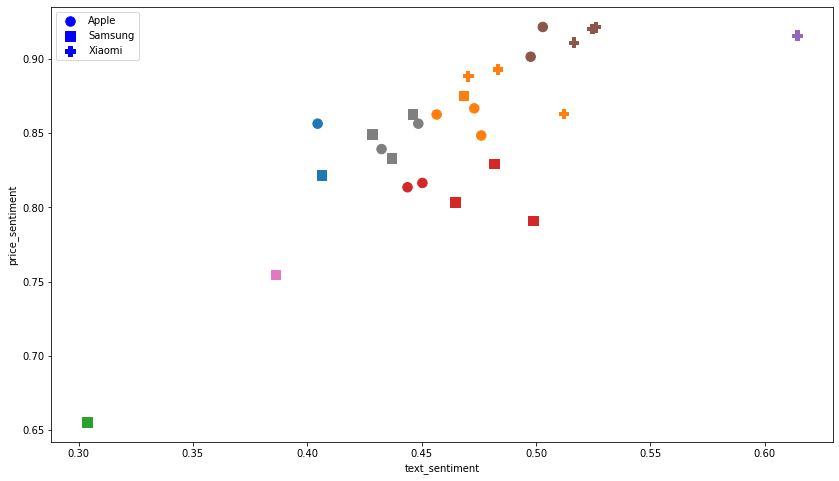

In [140]:
df2 = df1.groupby(['manufacturer', 'name']).mean().reset_index()
# X = df2['text_sentiment']
# Y = df2['price_sentiment']
# model=DBSCAN(eps=0.05)
# l=model.fit_predict(np.vstack((X,Y)).T)
model=KMeans(n_clusters=8)
l=model.fit_predict(df2[['text_sentiment', 'price_sentiment']])
size = 90
df2['l'] = l

color_dict = matplotlib.rcParams["axes.prop_cycle"]
df2['color'] = [list(list(color_dict)[x].values())[0] for x in df2.l.tolist()]

plt.figure(figsize=(14, 8))
plt.scatter(df2[df2.manufacturer == 'Apple']['text_sentiment'],df2[df2.manufacturer == 'Apple']['price_sentiment'], c = df2[df2.manufacturer == 'Apple']['color'], s = size)
plt.scatter(df2[df2.manufacturer == 'samsung']['text_sentiment'],df2[df2.manufacturer == 'samsung']['price_sentiment'], marker = 's', c = df2[df2.manufacturer == 'samsung']['color'], s = size)
plt.scatter(df2[df2.manufacturer == 'Xiaomi']['text_sentiment'],df2[df2.manufacturer == 'Xiaomi']['price_sentiment'], marker = 'P', c = df2[df2.manufacturer == 'Xiaomi']['color'], s = size)
plt.xlabel("text_sentiment")
plt.ylabel("price_sentiment")

ax = plt.gca()
plt.legend(["Apple", "Samsung", "Xiaomi"])
leg = ax.get_legend()
for i in range(3):
  leg.legendHandles[i].set_color('blue')

plt.show()

# plt.scatter(df2['text_sentiment'],df2['price_sentiment'], c=l)

In [141]:
def row_style(row):
  return pd.Series('background-color: {}'.format(row.color), row.index)

df2.sort_values(by=['l']).style.apply(row_style, axis=1)


,manufacturer,name,text_sentiment,price_sentiment,l,color
26,samsung,Смартфон Samsung Galaxy S8,0.406206,0.821822,0,#1f77b4
5,Apple,Смартфон Apple iPhone 5s,0.404526,0.856447,0,#1f77b4
20,samsung,Samsung Galaxy S II,0.468358,0.875450,1,#ff7f0e
12,Xiaomi,Смартфон Xiaomi Redmi 3S,0.511947,0.863337,1,#ff7f0e
11,Xiaomi,Мобильный телефон Xiaomi Redmi 4x,0.470199,0.888646,1,#ff7f0e
10,Xiaomi,Мобильный телефон Xiaomi Redmi 4 pro (3Gb/32Gb),0.483181,0.893240,1,#ff7f0e
8,Apple,Смартфон Apple iPhone SE,0.473025,0.866771,1,#ff7f0e
0,Apple,Смартфон Apple IPhone 6S,0.456565,0.862611,1,#ff7f0e
2,Apple,Смартфон Apple iPhone 4,0.476071,0.848483,1,#ff7f0e
18,samsung,Samsung GT-S5250 Wave525,0.303636,0.655321,2,#2ca02c


In [ ]:
# далее идут проверовные ячейки

In [2]:



messages = [
    'Минусы: завышенная цена зависает часто вылетают приложения, особенно браузеры частые обновления, из-за которых аппарат глючит ужасно слабая батарея',
    'Я счастлив проводить с тобою время',
    'Мне нравится эта музыкальная композиция',
    'В больнице была ужасная очередь',
    'Сосед с верхнего этажа мешает спать',
    'Маленькая девочка потерялась в торговом центре',
]

results = model.predict(messages, k=2)
pos, neg, all = 0, 0, 0
s = ''
for message, sentiment in zip(messages, results):
  s = sentiment
  if next(iter(sentiment)) == 'positive':
    pos = pos + 1
    print(message, '-&gt;', sentiment)
  if next(iter(results[0])) == 'negative':
    neg = neg + 1
    print(message, '-&gt;', sentiment)
  if message != '':
    all = all + 1
# выкинуть отзывы где тональность не соотвествует оценке
# тональность как (доля pos) - доля neg / 

Минусы: завышенная цена зависает часто вылетают приложения, особенно браузеры частые обновления, из-за которых аппарат глючит ужасно слабая батарея -&gt; {'positive': 0.2509227991104126, 'negative': 0.22816647589206696}
Я счастлив проводить с тобою время -&gt; {'positive': 0.5000100135803223, 'skip': 0.38492217659950256}
Мне нравится эта музыкальная композиция -&gt; {'positive': 0.9637899398803711, 'neutral': 0.21734751760959625}


In [33]:
 par = 2044
 df.iloc[par]

index                                                        2056
manufacturer                                                Apple
name                                     Смартфон Apple IPhone 6S
link            /content/iphone-6s-stoit-li-pokupat-seichas-sr...
author                                            Olgabykhovtseva
rating                                                        5.0
date                                    2018-10-19T17:29:46+02:00
summary         Iphone 6S стоит ли покупать сейчас? Сравнение ...
review          \nСкорость смены моделей компанией Apple с каж...
Name: 2044, dtype: object

In [ ]:
str1 = df.iloc[par]['review']
str2 = re.sub(r'[\xa0?]', '.', str1)
str3 = re.sub('\n', '.', str2)

str4 = re.sub('[\.]+', '.', str3)
str4

'.Начну с того, что я человек, который меняет телефоны ну очень редко. Обычно покупаю понравившуюся модель и хожу с ней, пока окончательно не сломается. У меня есть телефон Samsung, которому около 10 лет, и который я очень любила всё это время, и до сих пор им пользуюсь.В 2017 году недавно в мои руки попал Айфон 4, и меня стало затягивать ))) А тут и День Рождения подкрался. Так что теперь я обладательница Айфона 5S. И насчет смартфонов этой фирмы у меня сложилась своя позиция!Как я докатилась до Iphone 5SКак я уже говорила, дело было в 2017 году. Айфон 4 запал мне в душу. Со временем поняла чем: маленький, хорошенький (идеальный лаконичный дизайн) быстрый, чёткий. Так и хотелось его постоянно брать в руки, хоть и чужой ))) Но я старалась бороться с этим чувством, и хранить верность марке Samsung - у меня старый телефон и планшет этой фирмы. Я решила, что на самом деле мне нужен Samsung - поновее, побыстрее, с более продвинутой камерой. Положила глаз на Samsung S7. Но когда мне его дал

In [ ]:
tmp_str = 'Мама ела шашлык. купил по полной цене за 20000. Папа ехал на работу.'
re.search('[Сс]кидк..? | руб | цена | ценой | цене', tmp_str)
price_mention = ''
for line in tmp_str.split('.'):
  if re.search('[Сс]кидк..? | руб | цена | ценой | цене', line) != None:
    price_mention = line
if price_mention != '':
  print(price_mention)
else:
  print('Нет упоминания о цене')


Нет упоминания о цене


In [ ]:

# messages = str4.split('.')
# messages
round(2.5232, 2)

2.52

Минусы: завышенная цена зависает часто вылетают приложения, особенно браузеры частые обновления, из-за которых аппарат глючит ужасно слабая батарея -&gt; {'positive': 0.2509227991104126, 'negative': 0.22816647589206696}
Я счастлив проводить с тобою время -&gt; {'positive': 0.5000100135803223, 'skip': 0.38492217659950256}
Мне нравится эта музыкальная композиция -&gt; {'positive': 0.9637899398803711, 'neutral': 0.21734751760959625}
В больнице была ужасная очередь -&gt; {'negative': 0.9903015494346619, 'skip': 0.1520422399044037}
Сосед с верхнего этажа мешает спать -&gt; {'neutral': 0.839743971824646, 'negative': 0.18714269995689392}
Маленькая девочка потерялась в торговом центре -&gt; {'neutral': 0.23935934901237488, 'skip': 0.1778208613395691}


In [ ]:
mark = (pos- neg)/all
mark

0.11904761904761904

In [ ]:
# эта ячейка для проверочки
link_top10 = links_top10[0]
wd.get(irecommend+link_top10)
soup=BeautifulSoup(wd.page_source)
# так находятся ссылки на полные тексты отзывов с первой страницы товара
name = soup.find('span', class_='fn').text
pages_num = int(soup.find('ul', class_='pager').attrs['class'][2][6:])
review_links = [x.find('div', class_='reviewTitle').find('a').attrs['href'] for x in soup.find("ul", class_="list-comments").findAll('li') if x.find('div', class_='reviewTitle')!= None]
for i in range(1, pages_num):
  wd.get(irecommend+link_top10+'?page='+str(i))
  soup=BeautifulSoup(wd.page_source)
  review_links += [x.find('div', class_='reviewTitle').find('a').attrs['href'] for x in soup.find("ul", class_="list-comments").findAll('li') if x.find('div', class_='reviewTitle')!= None]

reviewBlocks_sel = []
for link in review_links:
  wd.get(irecommend+link)
  soup=BeautifulSoup(wd.page_source)
  reviewBlocks_sel.append(soup.find("div", class_="reviewBlock")) 

temp_dict = {'name': [name]*len(review_links),
             'link': review_links,
             'author': [x.find('div', class_="authorBlock").text.replace('\n', '').strip() for x in reviewBlocks_sel],
             'rating': [x.find('div', class_="starsRating").find_all('meta')[2].attrs['content'] for x in reviewBlocks_sel],
             'date': [x.find('div', class_="com-date").find('meta').attrs['content'] for x in reviewBlocks_sel],
             'summary': [x.find('a', class_="review-summary").text for x in reviewBlocks_sel],
             'review': [x.find('div', class_="description").text.replace('\\n\\n', '\\n') for x in reviewBlocks_sel],
}

In [ ]:
reviewBlocks[6].find('div', class_="authorBlock").text.replace('\n', '').strip()

'Sun12'

In [ ]:
reviewBlocks_sel[290].find('div', class_="starsRating").find_all('meta')[2].attrs['content']

'5'

In [ ]:
reviewBlocks[6].find('div', class_="com-date").find('meta').attrs['content']

'2021-11-26T10:11:21+01:00'

In [ ]:
reviewBlocks[6].find('li', class_="last").find('div', class_='item-data').text


AttributeError: ignored

In [ ]:
reviewBlocks[6].find('a', class_="review-summary").text

'Для понтов сойдет, для работы - полная лажа! Для меня есть другая более достойная альтернатива и это не Iphone. '

In [ ]:
reviewBlocks[6].find('div', class_="description").text.replace('\\n\\n', '\\n')

'\nВообще, я сильно не хотела писать отзыв на мой Айфон, так как прекрасно понимаю, что он мало что изменит в нашем мире «внешней красоты», и сторонники Айфонов в 13-м поколении будут несогласны.Но, поразмыслив, я решила написать его для тех, кто все же старается ставить вещи под сомнения, а также - для тех, кто раздумывает - переходить ли с Андроида на Айфон, стоит ли он своих денег и с какими отличиями от Андроида придется мириться, ибо жизнь он может потрепать на славу!\xa0ИСТОРИЯ ПОКУПКИ. \xa0Раньше я пользовалась Андроидами, вполне неплохими, и даже последним из них, о котором я напишу позже, я была на сто процентов довольна. Но ключевым моментом стало то, что смартфон угодил в стиральную машину и постирался с порошком. На удивление он остался рабочим. Почти… Даже экран не «растекся». И тем не менее, немного помутнела камера и пострадал разъем наушников. Также ещё был битый экран, который в целом то можно заменить и не дорого, но без звука и камеры это уже было ни к чему.Телефоны 

In [ ]:
[x.find('span', class_='counter').text for x in temp_tag.findAll("div", class_='ProductTizer')]
[x.find('div', class_='title').find('a').attrs['href'] for x in temp_tag.findAll("div", class_='ProductTizer')]

['1',
 '1',
 '3',
 '53',
 '198',
 '18',
 '47',
 '1',
 '1',
 '9',
 '2',
 '17',
 '27',
 '33',
 '9',
 '17',
 '37',
 '35',
 '2',
 '9']

In [ ]:
# уже больше никогда не нужно

In [42]:
names = ['apple', 'xiaomi','samsung']

# df_apple = pd.read_csv('./'+names[0]+'.csv', sep=';', encoding ='cp1251', encoding_errors='ignore')
# df_apple = df_apple[df_apple['manufacturer'].notna()].reset_index().drop(columns=['index'])
# df = pd.concat([df,df_apple])


# df_xiaomi = pd.read_csv('./'+names[1]+'.csv', sep=';', encoding ='cp1251',encoding_errors='ignore')
# df_xiaomi = df_xiaomi.drop(columns=['Unnamed: 0'])
# df_xiaomi = df_xiaomi[df_xiaomi['manufacturer'].notna()].reset_index().drop(columns=['index'])
# df = pd.concat([df,df_xiaomi])



# df_samsung = pd.read_csv('./'+names[2]+'.csv', encoding_errors='ignore')
# df_samsung = df_samsung.drop(columns=['Unnamed: 0'])
# df_samsung = df_samsung[df_samsung['manufacturer'].notna()].reset_index().drop(columns=['index'])
# df = pd.concat([df,df_temp])
df

,manufacturer,name,link,author,rating,date,summary,review
0,Apple,Смартфон Apple iPhone 5s,/content/khodila-s-iphone-5s-v-2021-godu-perez...,Alenasteel26,5.0,2021-10-07T13:13:49+02:00,Ходила с Iphone 5s в 2021 году Пережил свадьб...,\nВ 2016 году на окончание института бывший му...
1,Apple,Смартфон Apple iPhone 5s,/content/odin-iz-samykh-udachnykh-smartfonov-v...,Internity,5.0,2018-01-26T13:36:59+01:00,Один из самых удачных смартфонов в линейке App...,"\n Доброго времени суток, друзья! Сегодня у ме..."
2,Apple,Смартфон Apple iPhone 5s,/content/chestnyi-otzyv-o-plyusakh-i-minusakh-...,Monadora,4.0,2019-01-31T18:11:33+01:00,ЧЕСТНЫЙ ОТЗЫВ О ПЛЮСАХ И МИНУСАХ iPhone 5s пос...,"\n""Android критикуют те, у кого БЫЛ Android. А..."
3,Apple,Смартфон Apple iPhone 5s,/content/nadezhnaya-zvonilka-i-normalnaya-kame...,filippenko82,4.0,2022-07-27T12:53:55+02:00,Надежная звонилка и нормальная камера за миним...,\nАйфонами я пользуюсь с 2013 года. Первый мой...
4,Apple,Смартфон Apple iPhone 5s,/content/stoit-li-brat-iphone-5s-v-2020-godu,Slava002,5.0,2020-08-23T07:48:49+02:00,Стоит ли брать iPhone 5s в 2020 году?,"\nДоброе утро, друзья! Сегодня вновь решила об..."
...,...,...,...,...,...,...,...,...
5384,samsung,Samsung Galaxy S II,/content/srednii-byudzhetnyi-telefon,lyusiena,4.0,2016-01-14T09:39:04+01:00,Средний бюджетный телефон,\nКупила телефон 4 года назад. Функционал меня...
5385,samsung,Samsung Galaxy S II,/content/telefon-mechta-5,LeN@.,5.0,2013-03-10T13:48:23+01:00,телефон мечта,\n У этого телефона Супер амулет экр...
5386,samsung,Samsung Galaxy S II,/content/android-vashei-mechty,denis1997,5.0,2012-03-31T17:37:18+02:00,Андроид вашей мечты!,"\n Очень удобный андроид, поддержива..."
5387,samsung,Samsung Galaxy S II,/content/otlichnyi-telefon-71,germetikon2012,5.0,2012-08-26T14:07:47+02:00,Отличный телефон!,\n нужна подработка?Доступный и инте...


In [ ]:
bad_w = ["неудобн", "плохо", "проблема", "проблемны"]

good_w = ["хорош", "замечательн", "нравит"]
# [x in "неудобный диван" for x in bad_w].count(True) > 0
def classificator(name):
  if [x in name for x in bad_w].count(True) > 0: 
    return 'bad'
  elif [x in name for x in good_w].count(True) > 0: 
    return 'good'
  else:
    return 'neutral'